In [1]:
import keras
from keras.utils import np_utils
from tensorflow.keras import optimizers
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.callbacks import LearningRateScheduler, TensorBoard

batch_size    = 128
epochs        = 50
iterations    = 391
num_classes   = 10
log_filepath  = './lenet'

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
y_train = np_utils.to_categorical(y_train, num_classes) # one-hot 编码 (50000,10)
y_test = np_utils.to_categorical(y_test, num_classes) # one-hot 编码 (10000,10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# data preprocessing
x_train /= 255 #
x_test /= 255

In [4]:
def build_model():
    model = Sequential()
    model.add(Conv2D(6, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal', input_shape=(32,32,3)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(16, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(120, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dense(84, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [5]:
def scheduler(epoch):
    if epoch < 100:
        return 0.01
    if epoch < 150:
        return 0.005
    return 0.001

In [6]:
model = build_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

d:\anaconda3\envs\machinelearning\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [7]:
# set callback
tb_cb = TensorBoard(log_dir=log_filepath, histogram_freq=0)
change_lr = LearningRateScheduler(scheduler)
cbks = [change_lr,tb_cb]

# start traing 
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,callbacks=cbks,
              validation_data=(x_test, y_test), shuffle=True)

Epoch 1/50
391/391 [==============================] - 11s 28ms/step - loss: 1.8381 - accuracy: 0.3315 - val_loss: 1.5475 - val_accuracy: 0.4379
Epoch 2/50
391/391 [==============================] - 10s 26ms/step - loss: 1.4974 - accuracy: 0.4610 - val_loss: 1.4409 - val_accuracy: 0.4862
Epoch 3/50
391/391 [==============================] - 10s 26ms/step - loss: 1.3472 - accuracy: 0.5194 - val_loss: 1.4780 - val_accuracy: 0.4840
Epoch 4/50
391/391 [==============================] - 10s 24ms/step - loss: 1.2547 - accuracy: 0.5541 - val_loss: 1.3317 - val_accuracy: 0.5251
Epoch 5/50
391/391 [==============================] - 9s 23ms/step - loss: 1.1893 - accuracy: 0.5791 - val_loss: 1.2486 - val_accuracy: 0.5613
Epoch 6/50
391/391 [==============================] - 9s 24ms/step - loss: 1.1350 - accuracy: 0.5972 - val_loss: 1.2618 - val_accuracy: 0.5579
Epoch 7/50
391/391 [==============================] - 9s 24ms/step - loss: 1.0912 - accuracy: 0.6168 - val_loss: 1.1396 - val_accuracy: 0.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


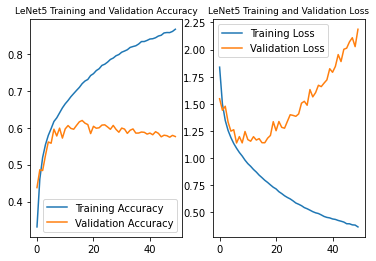

In [10]:
print(history.history.keys())

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('LeNet5 Training and Validation Accuracy', fontsize=9)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('LeNet5 Training and Validation Loss', fontsize=9)
plt.legend()

plt.show()
